In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing the data for visualization purpose

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data.drop(columns=['id','Name','City'])

In [4]:
# Creating dummy processed data for visualization
new = data

In [5]:
# Replacing missing values with 'other' to preserve data
new['Profession'] = new['Profession'].replace(np.nan, 'other')

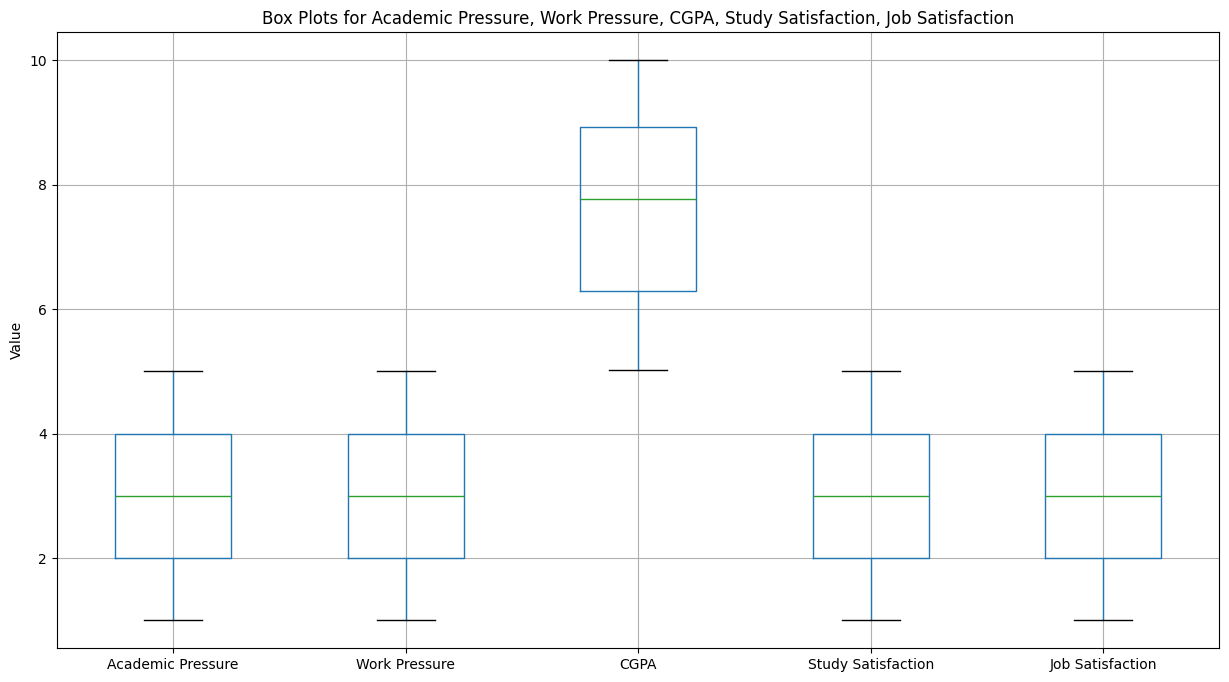

In [6]:
plt.figure(figsize=(15, 8))
features = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']
new[features].boxplot()
plt.title('Box Plots for Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction')
plt.ylabel('Value')
plt.show()

#### From the boxplot it is clear that no outlier exist hence the median, mean and mode are equal or almost equal, hence any central tendency can be used

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
new['Academic Pressure'] = imputer.fit_transform(new[['Academic Pressure']])
new['Work Pressure'] = imputer.fit_transform(new[['Work Pressure']])
new['CGPA'] = imputer.fit_transform(new[['CGPA']])
new['Study Satisfaction'] = imputer.fit_transform(new[['Study Satisfaction']])
new['Job Satisfaction'] = imputer.fit_transform(new[['Job Satisfaction']])

In [8]:
new.isnull().sum()


Gender                                   0
Age                                      0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         4
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
new.dropna(axis=0,inplace=True)

In [10]:
new.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Working Professional,Chef,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,other,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [11]:
pd.set_option('display.max_rows',None)
new['Degree'].value_counts()

Degree
Class 12                14728
B.Ed                    11690
B.Arch                   8742
B.Com                    8113
B.Pharm                  5856
BCA                      5738
M.Ed                     5668
MCA                      5234
BBA                      5030
BSc                      5027
MSc                      4879
LLM                      4647
M.Pharm                  4536
M.Tech                   4475
B.Tech                   4424
LLB                      4348
BHM                      4305
MBA                      3817
BA                       3750
ME                       3631
MD                       3383
MHM                      3286
BE                       3104
PhD                      3103
M.Com                    3094
MBBS                     3081
MA                       2887
M.Arch                      5
UX/UI Designer              4
M                           3
B.Sc                        3
Kalyan                      3
Bhopal                      2
BEd

In [12]:
# Creating a fucntion that will reduce the 115 unique values to their core field reducing feature and preventing DIMENSIONALITY CURSE.

def get_field_of_study(degree):
    """    Groups a specific degree string into a general field of study. """

    degree = str(degree).upper() # Standardize to uppercase for easier matching

    # Research
    if 'PHD' in degree:
        return 'Research'
    
    # Law
    if 'LLB' in degree or 'LLM' in degree:
        return 'Law'
        
    # Pharmacy / Medical (as they are related life sciences)
    if 'PHARM' in degree or 'MBBS' in degree or 'MD' in degree:
        return 'Pharmacy/Medical'
        
    # Commerce / Business
    if 'COM' in degree or 'BBA' in degree or 'MBA' in degree:
        return 'Commerce/Business'
        
    # Arts / Humanities
    if degree in ['BA', 'MA', 'MPA', 'BHM', 'MHM']:
        return 'Arts/Humanities'
        
    # Science
    if 'BSC' in degree or 'MSC' in degree or 'B.SC' in degree:
        return 'Science'
    
    # Engineering / Tech (A useful category from your data)
    if 'B.TECH' in degree or 'M.TECH' in degree or 'BCA' in degree or 'MCA' in degree or 'BE' in degree or 'ME' in degree:
        return 'Engineering/Tech'
    
    # Education
    if 'ED' in degree:
        return 'Education'
        
    # Architecture
    if 'ARCH' in degree:
        return 'Architecture'
        
    # High School
    if 'CLASS' in degree:
        return 'High School'

    # If none of the above, classify as 'Other'
    return 'Other'

# --- Applying the function on the DataFrame ---
new['FieldOfStudy'] = new['Degree'].apply(get_field_of_study)


print(new['FieldOfStudy'].value_counts())

FieldOfStudy
Engineering/Tech     26611
Commerce/Business    20059
Education            17365
Pharmacy/Medical     16863
High School          14729
Arts/Humanities      14229
Science               9909
Law                   8997
Architecture          8751
Research              3103
Other                   74
Name: count, dtype: int64


In [13]:
new['Profession'].value_counts()

Profession
other                     36622
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4228
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1469
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

In [14]:
def get_professional_field(profession):
    """
    Groups a specific profession string into a general field.
    """
    profession = str(profession).lower() # Standardize to lowercase

    # Education
    if any(p in profession for p in ['teacher', 'academic', 'educational consultant']):
        return 'Education'
        
    # Healthcare
    if any(p in profession for p in ['pharmacist', 'doctor', 'chemist']):
        return 'Healthcare'
        
    # Finance / Business / Management
    if any(p in profession for p in ['hr manager', 'consultant', 'business analyst', 
                                     'financial analyst', 'sales executive', 'manager',
                                     'accountant', 'investment banker', 'marketing']):
        return 'Finance/Business'
        
    # Tech / Engineering / Design
    if any(p in profession for p in ['architect', 'data scientist', 'software engineer', 
                                     'civil engineer', 'mechanical engineer', 'ux/ui', 
                                     'graphic designer', 'digital marketer']):
        return 'Tech/Engineering/Design'
        
    # Legal
    if any(p in profession for p in ['lawyer', 'judge']):
        return 'Legal'
        
    # Other Services
    if any(p in profession for p in ['content writer', 'chef', 'pilot', 'plumber', 
                                     'electrician', 'customer support', 'travel consultant',
                                     'researcher', 'research analyst']):
        return 'Other Services'

    # Student / Unemployed
    if 'student' in profession or 'unemployed' in profession:
        return 'Student/Unemployed'

    # Catch all other irrelevant values
    return 'Other'

# --- Apply this function to your DataFrame ---
new['ProfessionalField'] = new['Profession'].apply(get_professional_field)


# --- Check the new, cleaner distribution ---
print(new['ProfessionalField'].value_counts())

ProfessionalField
Other                      40951
Education                  27763
Finance/Business           22031
Other Services             20992
Tech/Engineering/Design    14903
Healthcare                 10116
Legal                       3924
Student/Unemployed            10
Name: count, dtype: int64


In [15]:
new = new.drop(columns=['Profession','Degree'])
new.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,FieldOfStudy,ProfessionalField
0,Female,49.0,Working Professional,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,No,1.0,2.0,No,0,Arts/Humanities,Other Services
1,Male,26.0,Working Professional,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,Law,Education
2,Male,33.0,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,Pharmacy/Medical,Other
3,Male,22.0,Working Professional,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,Commerce/Business,Education
4,Female,30.0,Working Professional,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,Commerce/Business,Finance/Business


In [16]:
new['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38781
7-8 hours            36968
More than 8 hours    32724
5-6 hours            32138
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [17]:
def sleepduration(sleepDuration):
    durations = ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours']
    
    if sleepDuration in durations:
        return sleepDuration
    else:
        return 'other'
        
new['SleepScore'] = new['Sleep Duration'].apply(sleepduration)
print(new['SleepScore'].value_counts())

SleepScore
Less than 5 hours    38781
7-8 hours            36968
More than 8 hours    32724
5-6 hours            32138
other                   79
Name: count, dtype: int64


In [18]:
def healthcat(cat):
    category = ['Moderate','Unhealthy','Healthy']
    
    if cat in category:
        return cat
    else:
        return 'Healthy'
        
new['Dietary Habits'] = new['Dietary Habits'].apply(healthcat)

In [19]:
new['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49704
Unhealthy    46224
Healthy      44762
Name: count, dtype: int64

In [20]:
new.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,FieldOfStudy,ProfessionalField,SleepScore
0,Female,49.0,Working Professional,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,No,1.0,2.0,No,0,Arts/Humanities,Other Services,More than 8 hours
1,Male,26.0,Working Professional,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,Law,Education,Less than 5 hours
2,Male,33.0,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,Pharmacy/Medical,Other,5-6 hours
3,Male,22.0,Working Professional,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,Commerce/Business,Education,Less than 5 hours
4,Female,30.0,Working Professional,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,Commerce/Business,Finance/Business,5-6 hours


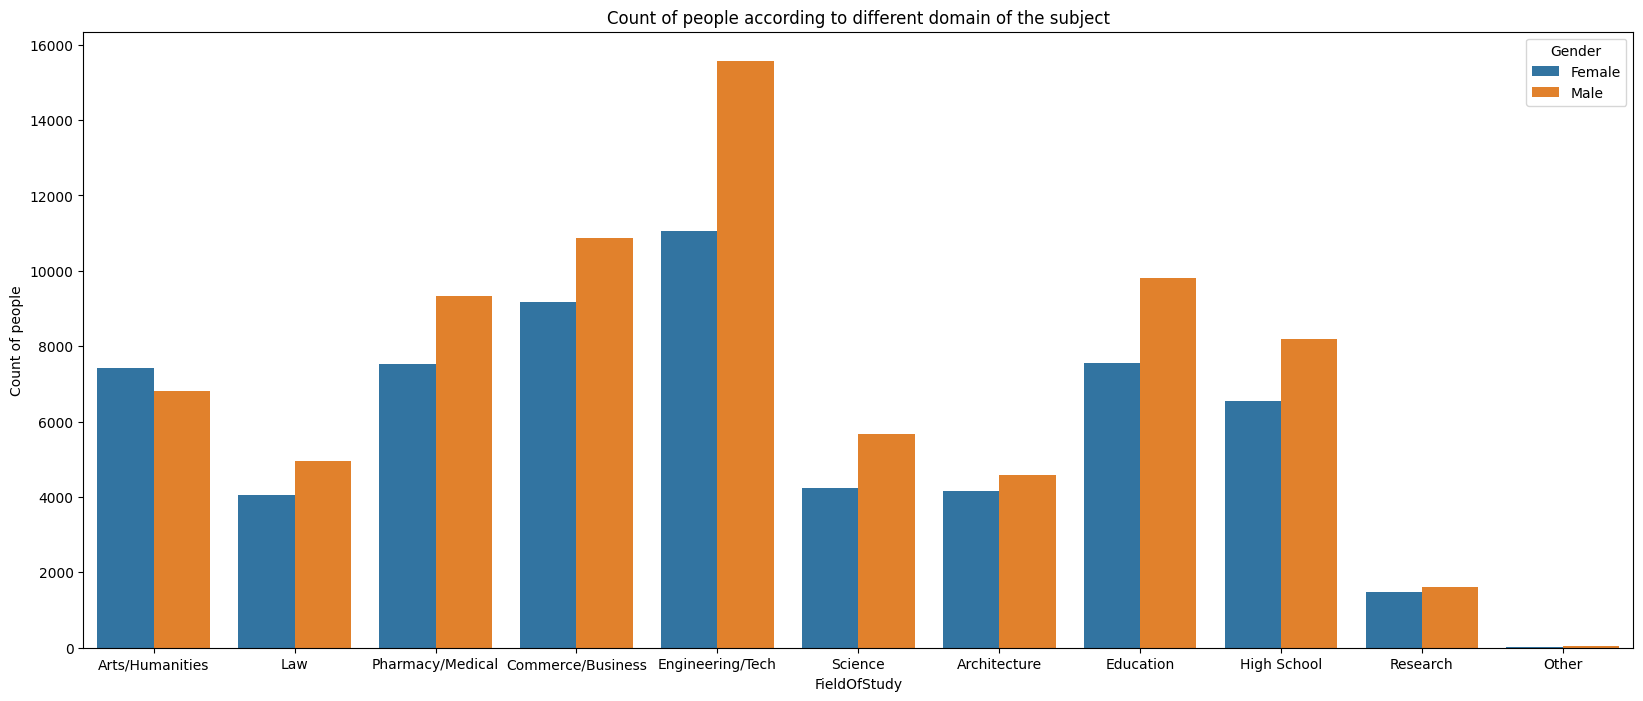

In [21]:
plt.figure(figsize=(20,8))
plt.ylabel('Count of people')
plt.title('Count of people according to different domain of the subject')
sns.countplot(data=new,x='FieldOfStudy',hue='Gender')
plt.show()

Assumptions from the graph
* Male are leading in every field except Arts/Humanities
* Engineering/Tech has the most number of people and Reasearch has the least

Note: Ignore the  *'Other'* label since it is kept to preserve data

<Axes: title={'center': 'Total number of people not having Depression according to their Field of Study'}, xlabel='FieldOfStudy', ylabel='count of people not having depression'>

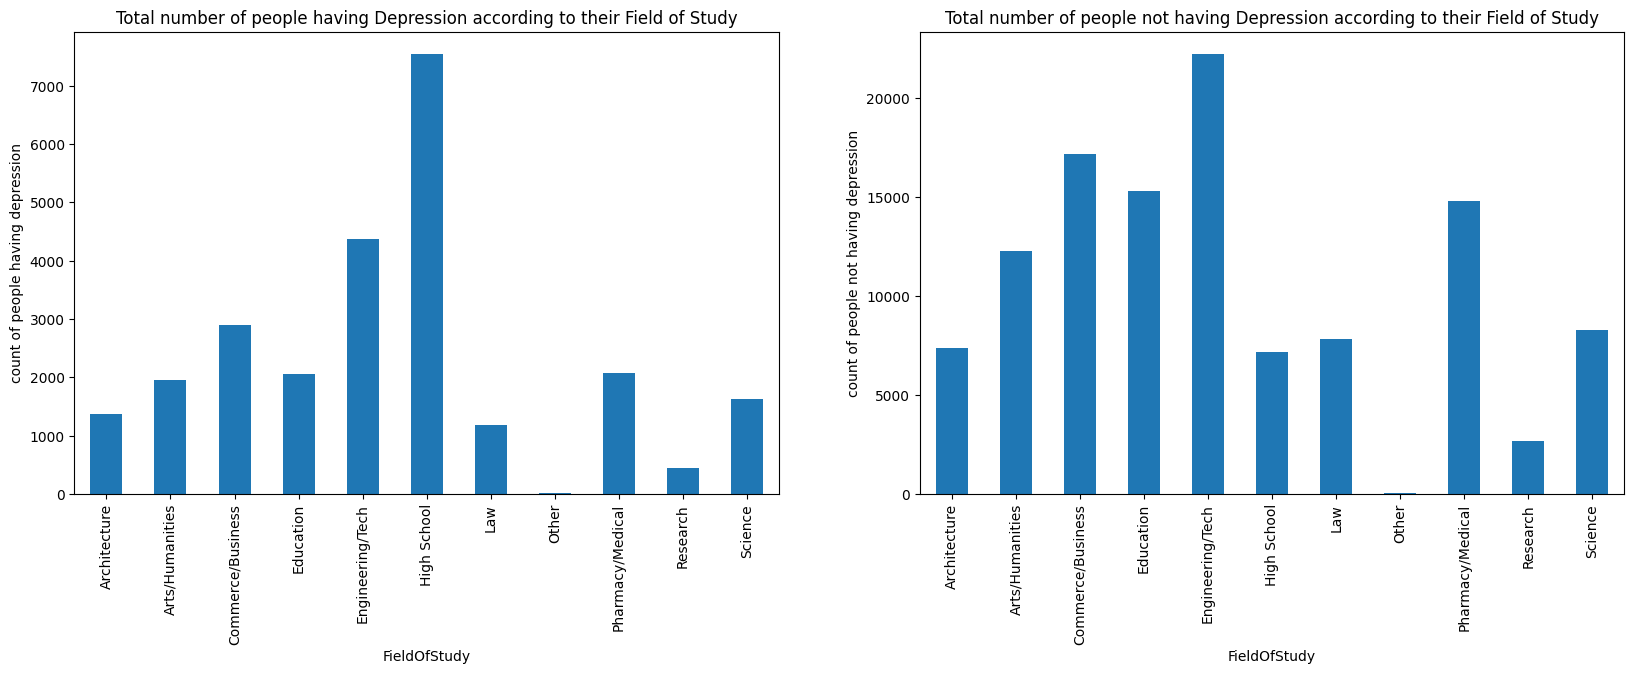

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Total number of people having Depression according to their Field of Study')
plt.ylabel('count of people having depression')
new[new['Depression']==1].groupby('FieldOfStudy')['Depression'].count().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Total number of people not having Depression according to their Field of Study')
plt.ylabel('count of people not having depression')
new[new['Depression']==0].groupby('FieldOfStudy')['Depression'].count().plot(kind='bar')



### From the above graph follwoing assumption can be made
* *High schools* students has the most probablity having depression while *researchers* have the least
* *Engineers/Techies*  has the most probablity of *not* having depression while *researchers* still have the least probablity of not having depression

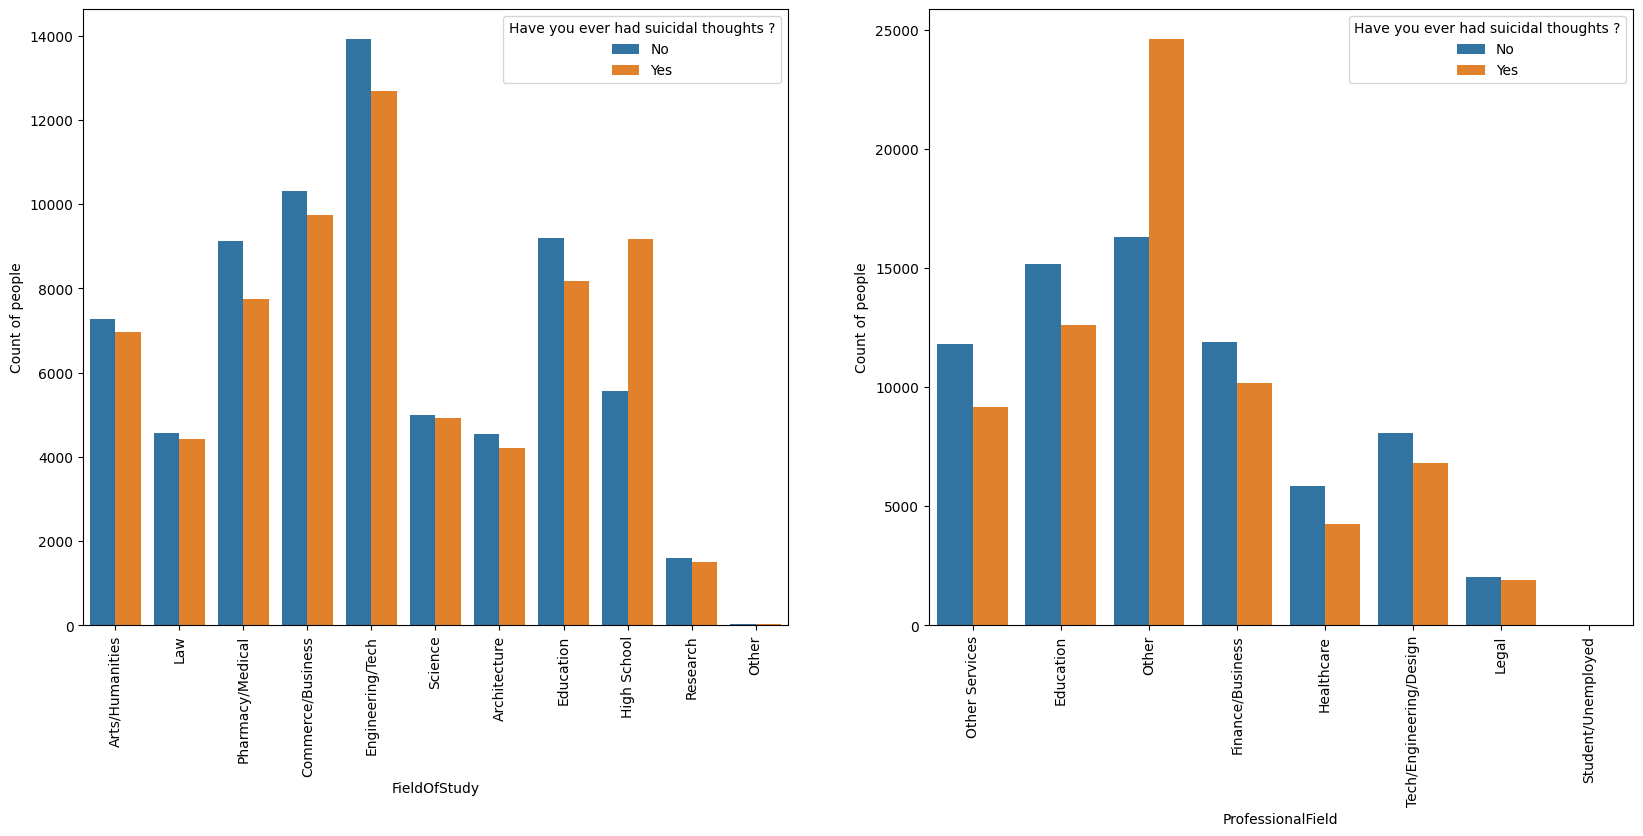

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.ylabel('Count of people')
plt.xticks(rotation=90)
sns.countplot(data=new,x='FieldOfStudy',hue='Have you ever had suicidal thoughts ?')


plt.subplot(1,2,2)
plt.ylabel('Count of people')
plt.xticks(rotation=90)
sns.countplot(data=new,x='ProfessionalField',hue='Have you ever had suicidal thoughts ?')

plt.show()

## Assumptions
#### Field of Study
* Engineering/Tech people have more suicidal thoughts
* Researchers have the least

#### Professional Field
* Other/Other Services has the most suicidal thoughts or we can say education (student or teachers)
* Legal profession (Advocates/Lawyers/Judges) have the least suicidal thoughts

<Axes: >

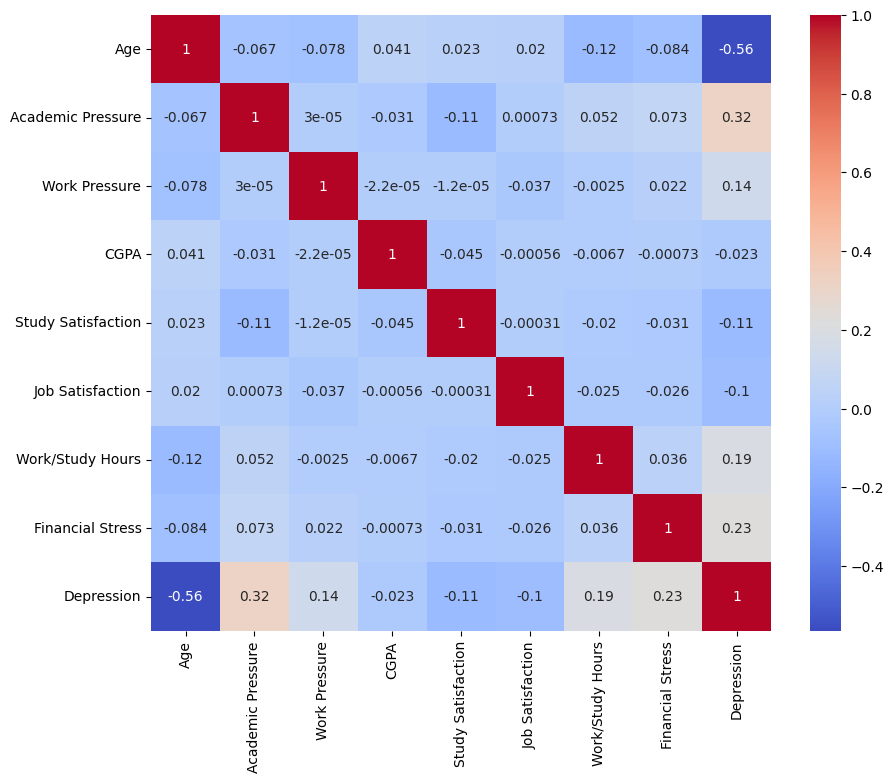

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

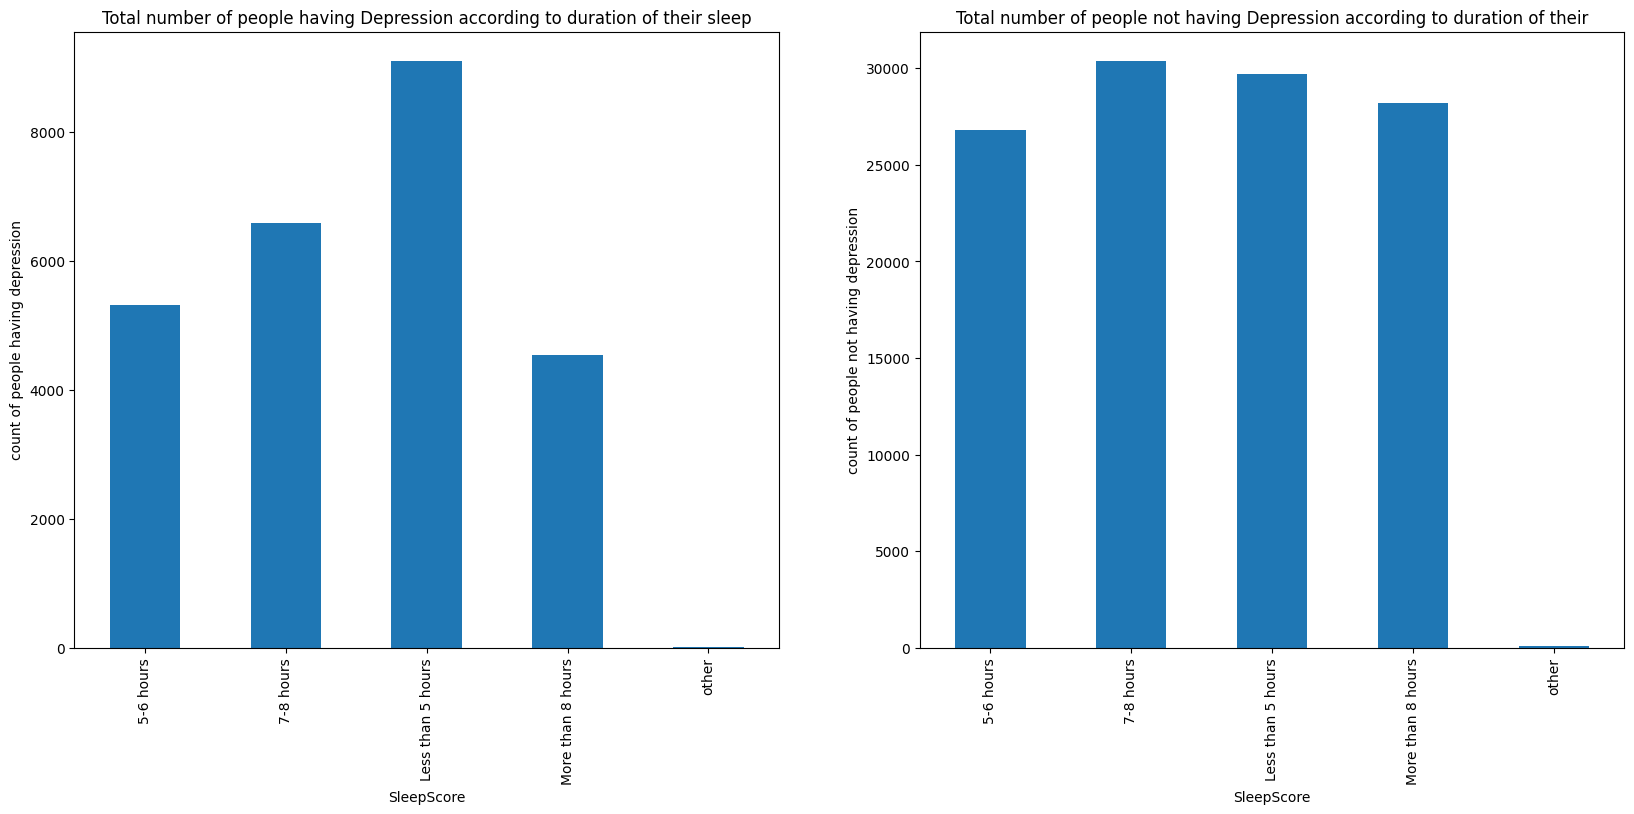

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Total number of people having Depression according to duration of their sleep')
plt.ylabel('count of people having depression')
new[new['Depression']==1].groupby('SleepScore')['Depression'].count().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Total number of people not having Depression according to duration of their')
plt.ylabel('count of people not having depression')
new[new['Depression']==0].groupby('SleepScore')['Depression'].count().plot(kind='bar')
plt.show()

As we can see the more people getting their sleep the lesser is their depression count(right)

And vice-versa for left

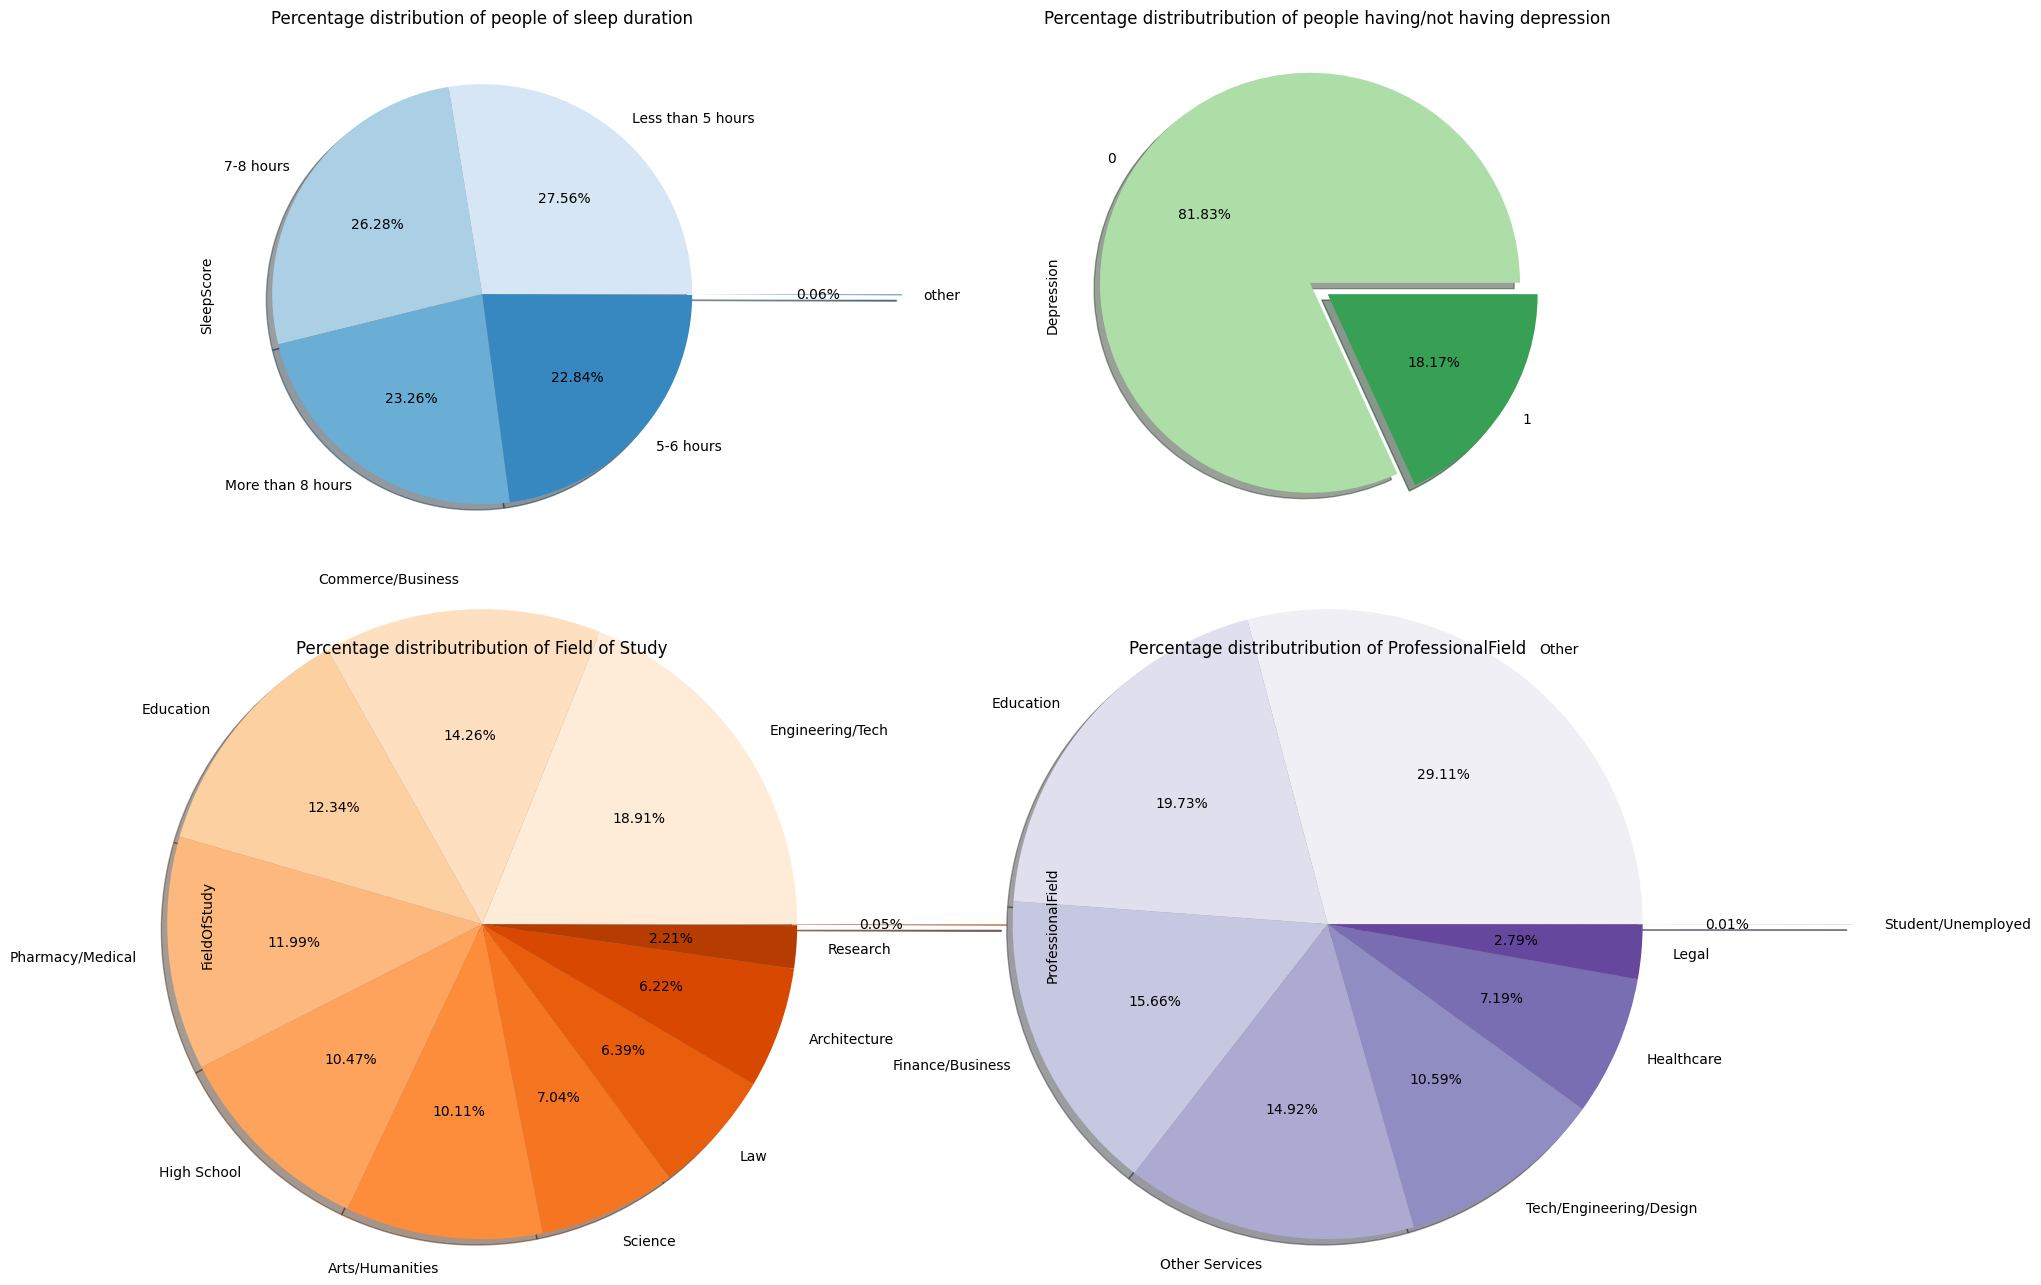

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.ylabel('SleepScore')
plt.pie(data=new,x=new['SleepScore'].value_counts().values,labels=new['SleepScore'].value_counts().index,shadow=True,explode=(0,0,0,0,1),colors=sns.color_palette('Blues',len(new['SleepScore'].value_counts())),autopct='%.2f%%')
plt.title('Percentage distribution of people of sleep duration')
# NOTE: The pie chart has five arcs values for other is too small to be visible



plt.subplot(2,2,2)
plt.ylabel('Depression')
plt.pie(data=new,x=new['Depression'].value_counts().values,labels=new['Depression'].value_counts().index,shadow=True,explode=(0.1,0),colors=sns.color_palette('Greens',len(new['Depression'].value_counts())),autopct='%.2f%%')
plt.title('Percentage distributribution of people having/not having depression')

plt.subplot(2,2,3)
plt.ylabel('FieldOfStudy')
plt.pie(data=new,x=new['FieldOfStudy'].value_counts().values,labels=new['FieldOfStudy'].value_counts().index,shadow=True,explode=(0,0,0,0,0,0,0,0,0,0,1),colors=sns.color_palette('Oranges',len(new['FieldOfStudy'].value_counts())),autopct='%.2f%%',radius=1.5)
plt.title('Percentage distributribution of Field of Study')

plt.subplot(2,2,4)
plt.ylabel('ProfessionalField')
plt.pie(data=new,x=new['ProfessionalField'].value_counts().values,labels=new['ProfessionalField'].value_counts().index,shadow=True,explode=(0,0,0,0,0,0,0,1),colors=sns.color_palette('Purples',len(new['ProfessionalField'].value_counts())),autopct='%.2f%%',radius=1.5)
plt.title('Percentage distributribution of ProfessionalField')


plt.show()


<Axes: xlabel='FieldOfStudy', ylabel='count'>

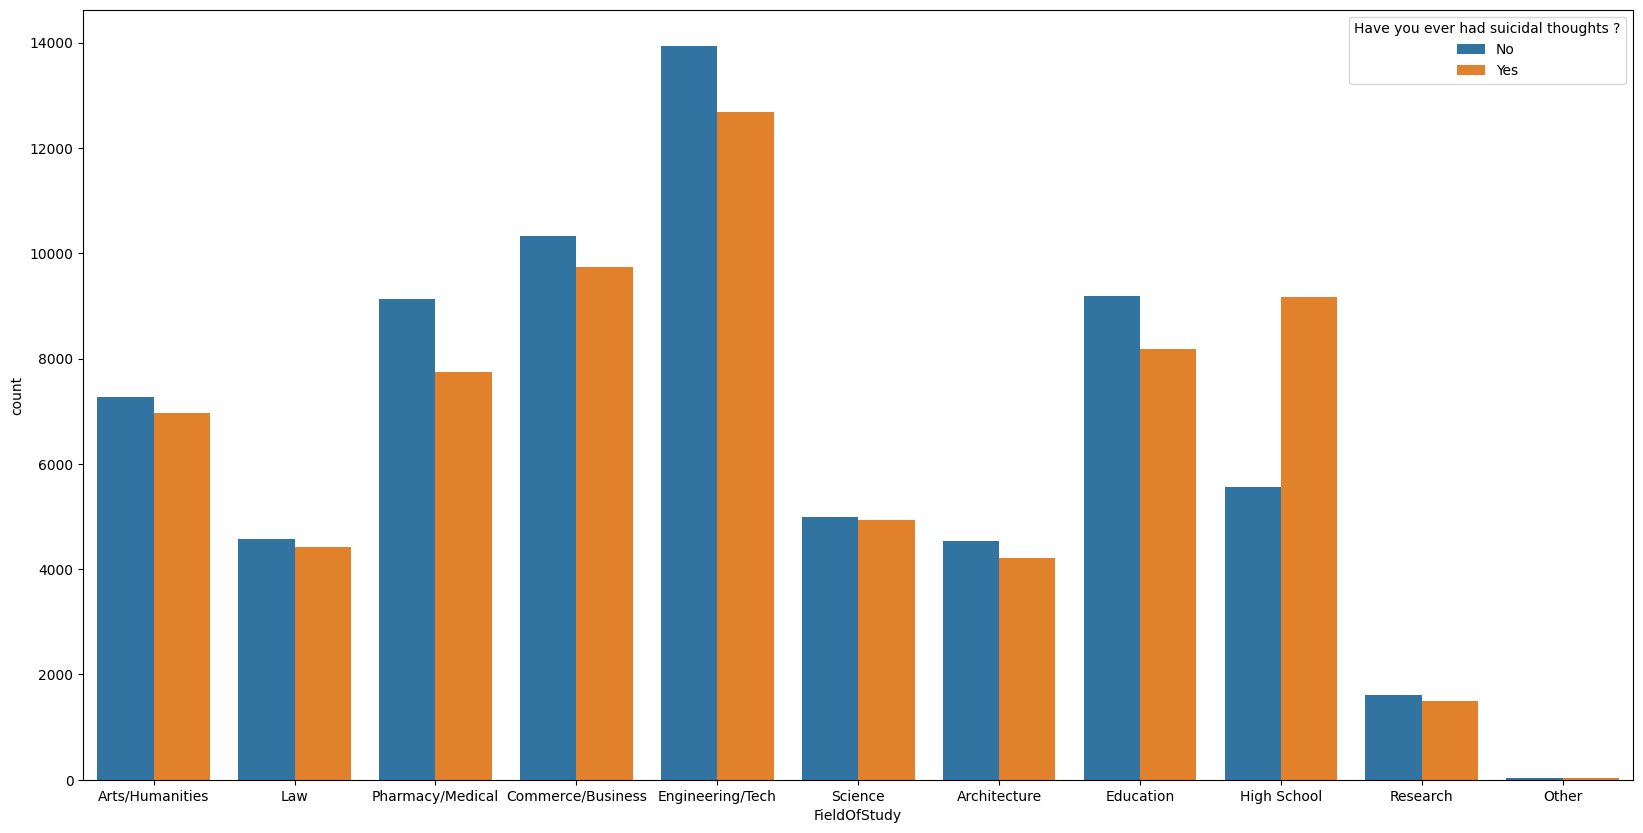

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data=new,x='FieldOfStudy',hue='Have you ever had suicidal thoughts ?')

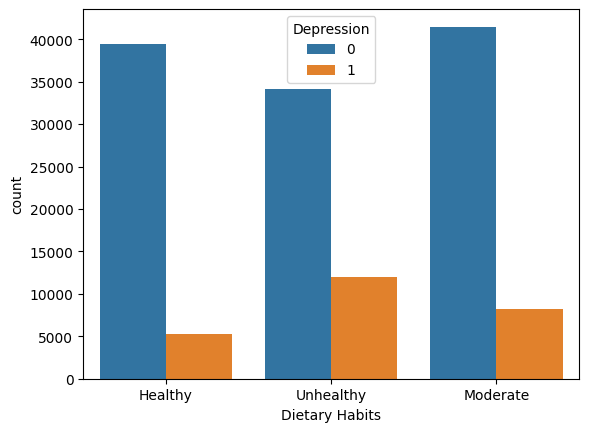

In [28]:
# plt.figure(figsize=(10,8))
sns.countplot(data=new,x='Dietary Habits',hue='Depression')
plt.show()

<Axes: xlabel='ProfessionalField', ylabel='count'>

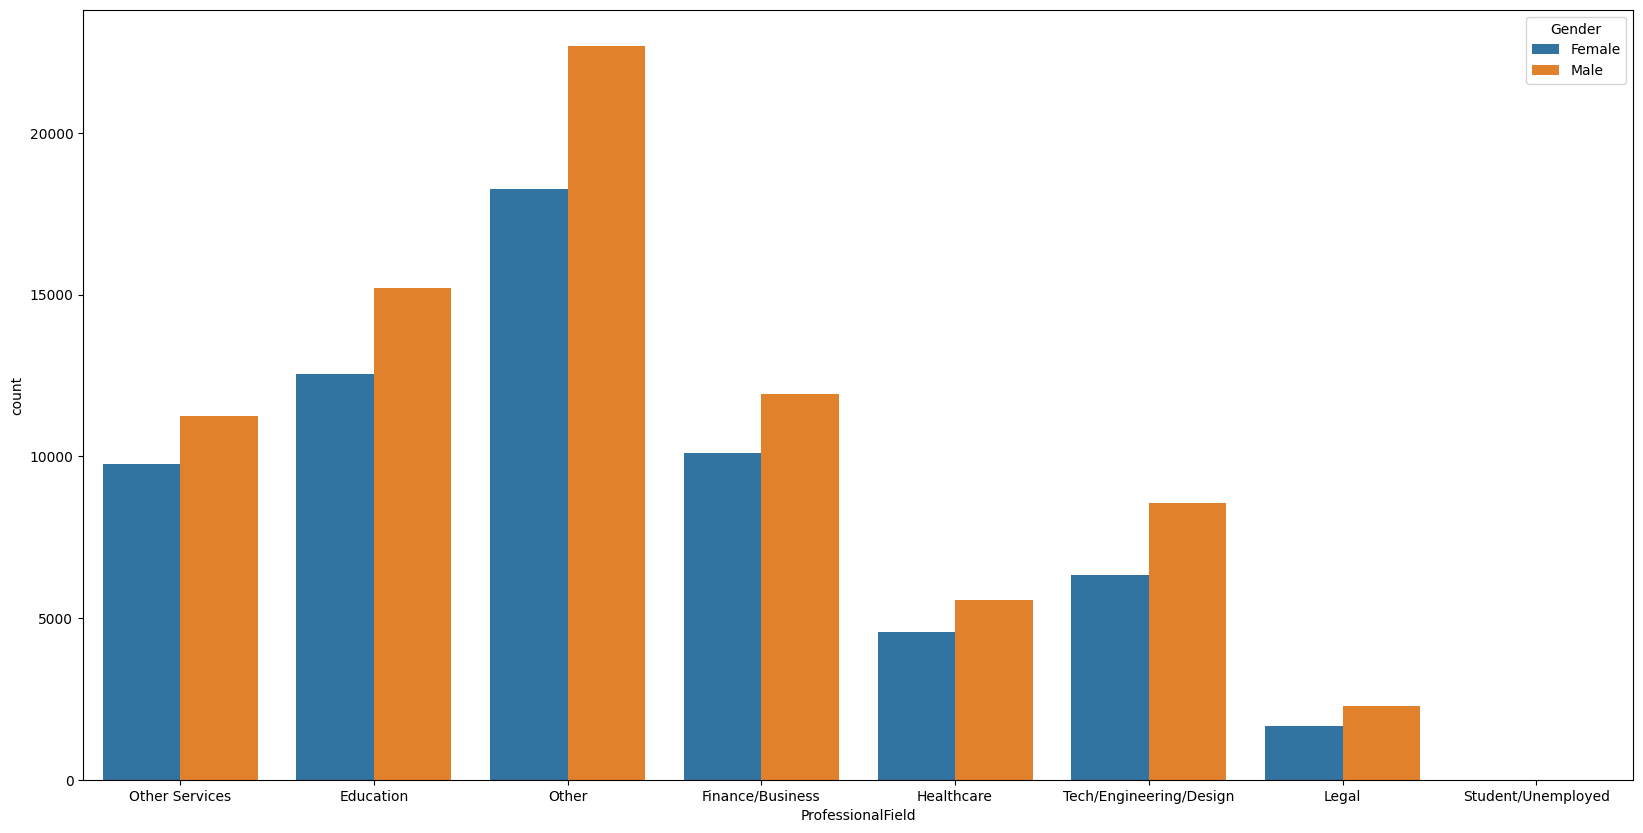

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='ProfessionalField',hue='Gender',data=new)


In [30]:
new.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,FieldOfStudy,ProfessionalField,SleepScore
0,Female,49.0,Working Professional,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,No,1.0,2.0,No,0,Arts/Humanities,Other Services,More than 8 hours
1,Male,26.0,Working Professional,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,Law,Education,Less than 5 hours
2,Male,33.0,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,Pharmacy/Medical,Other,5-6 hours
3,Male,22.0,Working Professional,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,Commerce/Business,Education,Less than 5 hours
4,Female,30.0,Working Professional,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,Commerce/Business,Finance/Business,5-6 hours


# Preprocessing for model creation

In [31]:
df = pd.read_csv('train.csv')

In [32]:
df['FieldOfStudy'] = df['Degree'].apply(get_field_of_study)
df['ProfessionalField'] = df['Profession'].apply(get_professional_field)
df['SleepScore'] = df['Sleep Duration'].apply(sleepduration)
df['Dietary Habits'] = df['Dietary Habits'].apply(healthcat)

In [33]:
df = df.drop(columns=['id','Name','City','Profession','Degree','Sleep Duration'])


In [34]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,FieldOfStudy,ProfessionalField,SleepScore
0,Female,49.0,Working Professional,NaN,5.0,NaN,NaN,2.0,Healthy,No,1.0,2.0,No,0,Arts/Humanities,Other Services,More than 8 hours
1,Male,26.0,Working Professional,NaN,4.0,NaN,NaN,3.0,Unhealthy,Yes,7.0,3.0,No,1,Law,Education,Less than 5 hours
2,Male,33.0,Student,5.0,NaN,8.97,2.0,NaN,Healthy,Yes,3.0,1.0,No,1,Pharmacy/Medical,Other,5-6 hours
3,Male,22.0,Working Professional,NaN,5.0,NaN,NaN,1.0,Moderate,Yes,10.0,1.0,Yes,1,Commerce/Business,Education,Less than 5 hours
4,Female,30.0,Working Professional,NaN,1.0,NaN,NaN,1.0,Unhealthy,Yes,9.0,4.0,Yes,0,Commerce/Business,Finance/Business,5-6 hours


In [44]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define your target column (update as needed)
y = df['Depression']  # Replace with actual target column
X = df.drop(columns=['Depression'])  # Drop target from features


# Columns for label encoding
label_encode_features = [
    'Gender',
    'Working Professional or Student',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

# Columns for one-hot encoding
onehot_features = [
    'Dietary Habits',
    'FieldOfStudy',
    'ProfessionalField',
    'SleepScore'
]

# Columns for numeric imputation
numeric_features = [
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction'
]


# For numeric columns — fill missing with mean
numeric_transformer = SimpleImputer(strategy='mean')

# For label-encoded columns — ordinal encoder with most frequent fill
label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# For one-hot columns — most frequent fill + one-hot encode
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('label', label_transformer, label_encode_features),
        ('onehot', onehot_transformer, onehot_features)
    ])





In [45]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_preprocessed = preprocessor.transform(X_test)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':[1,2,3,4,5,6,7],
    'min_samples_split':[2,3,4,5,6,7,8,10],
    'max_depth':[10,20,30,40,50],
    'max_features':['log2','sqrt']
}

rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf.fit(X_train_preprocessed,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [10, 20, ...], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [54]:
y_pred = rf.predict(X_test_preprocessed)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22986
           1       0.81      0.67      0.73      5154

    accuracy                           0.91     28140
   macro avg       0.87      0.82      0.84     28140
weighted avg       0.91      0.91      0.91     28140



In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[22176,   810],
       [ 1721,  3433]])

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the processed test set
y_pred_proba = rf.predict_proba(X_test_preprocessed)[:, 1]

# Calculate the values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

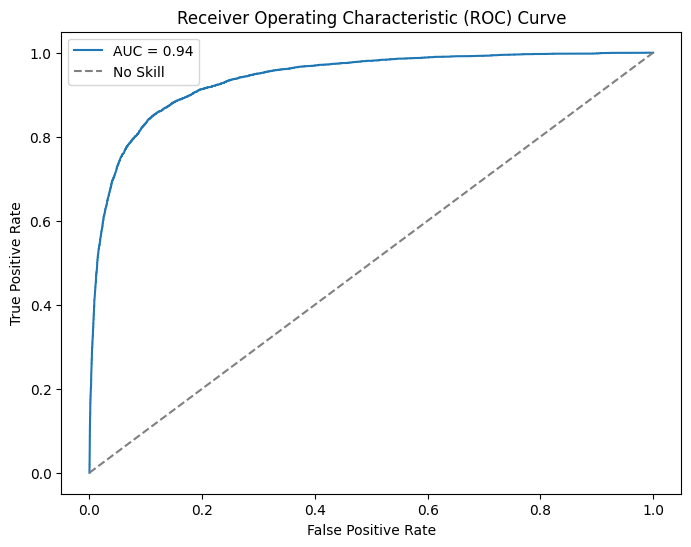

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')

# Plot the "no skill" baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()